# Unsupervised Learning Algorithms

**Unsupervised learning:** finding patterns in data without any labels.

![unsupervised](img/kmc.png)

Common types of unsupervised learning algorithms include:
* Clustering: grouping similar data points together
* Dimensionality reduction: reducing the number of features in a dataset
* Anomaly detection: finding outliers in a dataset

## 1. Clustering

Clustering is a common way to discover patterns and subgroups that are interesting in our data. For example, we might want to group customers into segments based on their purchasing behavior, or group documents based on their content. There are many different clustering algorithms. See just a few of those implemented in Scikit-Learn:

<img src="img/skl_cl.png" alt="clustering" width="85%" />

In [1]:
from utils import create_answer_box

In [2]:
create_answer_box("Describe a dataset that would be appropriate for unsupervised learning. (If possible, describe a dataset you do or may work with in your research!)", "03-01")

Describe a dataset that would be appropriate for unsupervised learning. (If possible, describe a dataset you do or may work with in your research!)

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

### K-Means Clustering

K-Means is a simple and popular clustering algorithm that is used to partition a dataset into K clusters. The algorithm works by iteratively assigning data points to clusters based on the distance between the data point and the cluster center. The cluster center is then updated to be the mean of all the data points assigned to that cluster. This process is repeated until the algorithm converges.

We can look at this in action using the Iris dataset, which is a dataset containing information about iris flowers. The dataset contains 150 samples and 4 features. The goal is to cluster the flowers into different groups based on their features. Though we actually know the flower species, for this example we imagine that we don't -- we just have the features, and we want to see if we can group the flowers into clusters.

/software/slurm/spackages/linux-rocky8-x86_64/gcc-12.2.0/anaconda3-2023.09-0-3mhml42fa64byxqyd5fig5tbih625dp2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.6741313115143868
Calinski-Harabasz Index: 1149.6677889350308

Comparison with true labels:
Adjusted Rand Index: 0.8856970310281228
Normalized Mutual Information: 0.8641855068202219


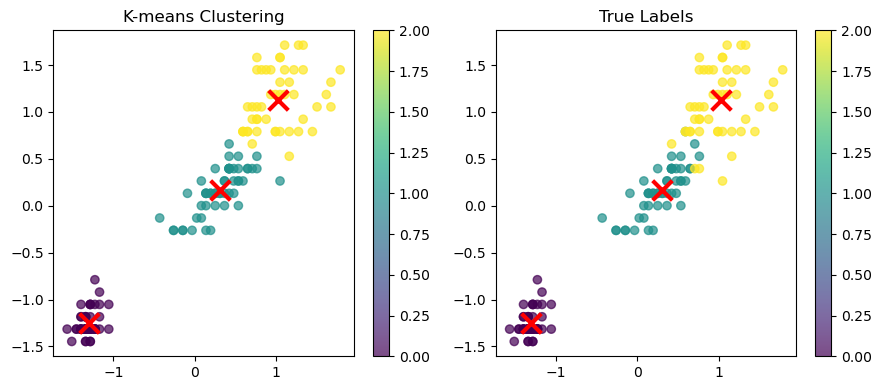

In [3]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # We'll use petal length and width

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Evaluate the clustering
print("Silhouette Score:", silhouette_score(X_scaled, y_kmeans))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, y_kmeans))

# Compare with true labels
print("\nComparison with true labels:")
print("Adjusted Rand Index:", adjusted_rand_score(iris.target, y_kmeans))
print("Normalized Mutual Information:", normalized_mutual_info_score(iris.target, y_kmeans))

# Define the centroids of the clusters
centroids = kmeans.cluster_centers_

# Create a mapping function. This is only here to make the plots consistent in color.
def map_labels(y_kmeans, y_true):
    mapping = {}
    for k in range(n_clusters):
        k_indices = y_kmeans == k
        k_true = y_true[k_indices]
        mapping[k] = np.bincount(k_true).argmax()
    return np.array([mapping[k] for k in y_kmeans])

# Apply the mapping
y_kmeans_mapped = map_labels(y_kmeans, iris.target)

# Plot comparison with true labels
plt.figure(figsize=(9, 4))

plt.subplot(121)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_mapped, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering')
plt.colorbar(scatter)

plt.subplot(122)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris.target, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('True Labels')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

Now let's see K-Means in action on a more complex dataset. We'll use the Labeled Faces in the Wild dataset, which is a dataset containing images of faces. The dataset contains 13,233 sample images. We'll use K-Means to cluster the faces into different groups based on their features.

In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn import cluster, decomposition

lfw_people = fetch_lfw_people()
lfw_people.data.shape
n_samples, n_features = lfw_people.data.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = lfw_people.data - lfw_people.data.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 13233 faces


In [5]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (62, 47)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

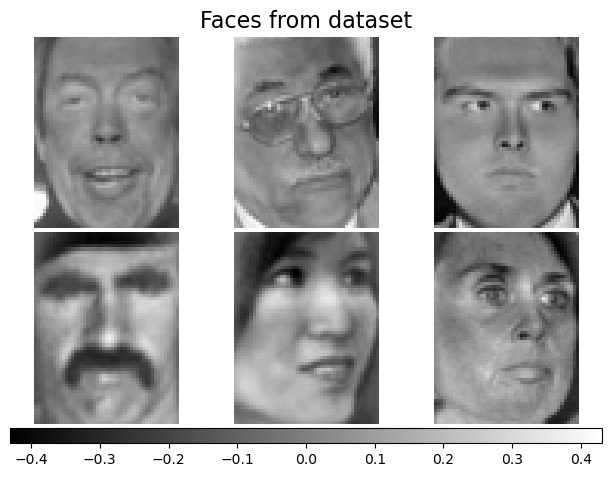

In [6]:
plot_gallery("Faces from dataset", faces_centered[:n_components])

Now let's apply K-Means to the faces dataset. We can then examine the cluster centroids. 

/software/slurm/spackages/linux-rocky8-x86_64/gcc-12.2.0/anaconda3-2023.09-0-3mhml42fa64byxqyd5fig5tbih625dp2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


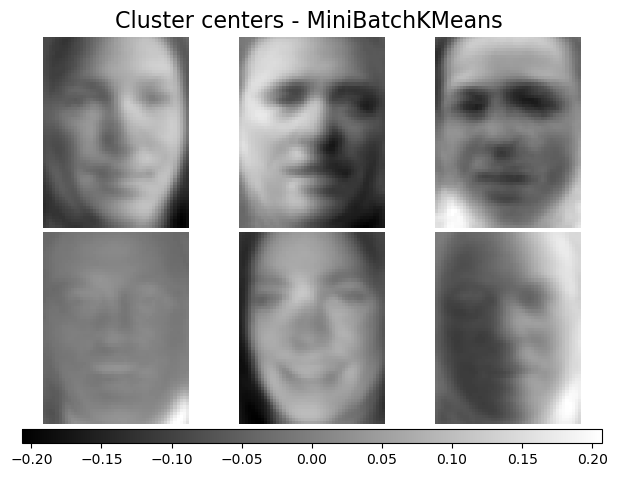

In [7]:
kmeans_estimator = cluster.MiniBatchKMeans(
    n_clusters=24,
    tol=1e-3,
    batch_size=1000,
    max_iter=1000,
    random_state=355,
)
kmeans_estimator.fit(faces_centered)
plot_gallery(
    "Cluster centers - MiniBatchKMeans",
    kmeans_estimator.cluster_centers_[:n_components],
)

In [8]:
create_answer_box("We're looking at the \"centroid\" for each cluster of faces. But what does that mean, in non-technical terms? What do these images represent about our data?", "03-02")

We're looking at the "centroid" for each cluster of faces. But what does that mean, in non-technical terms? What do these images represent about our data?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

## 2. Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features in a dataset. This can be useful for a number of reasons, including:
* Reducing the computational cost of working with high-dimensional data
* Reducing the noise in the data
* Visualizing high-dimensional data in a lower-dimensional space

### PCA

Principal Component Analysis (PCA) is a popular dimensionality reduction technique often used for the first two reasons above. It works by finding the directions (or principal components) in which the data varies the most. These directions are then used to transform the data into a lower-dimensional space. PCA is often used before applying other machine learning algorithms to the data, including supervised learning algorithms.

Why is PCA used this way? Imagine you could construct your ideal ML data set for some phenomenon you’re studying. Three things you’d want:
* High variance features that are
* Uncorrelated, and are also
* Few in number.

PCA makes your data more aligned with these three goals. It replaces your original features with new ones that are uncorrelated and ordered by how much variance they explain. So you can keep only the few features that explain most of the variance, and throw away the rest. PCA is implicitly lossy compression.

![pca](img/pca.png)


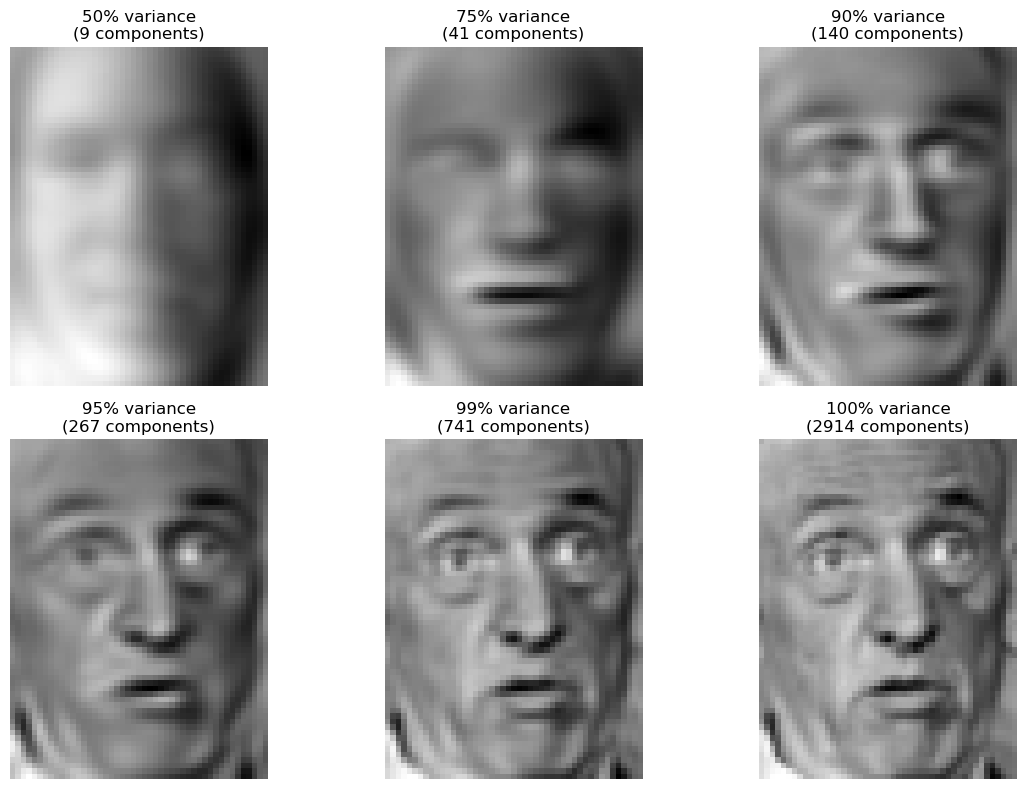

50% variance explained by 9 components
75% variance explained by 41 components
90% variance explained by 140 components
95% variance explained by 267 components
99% variance explained by 741 components
100% variance explained by 1 components

Dataset consists of 13233 faces
Each face has 2914 features


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming faces_centered is already defined as per your previous code

# Perform PCA on the entire dataset
pca = PCA().fit(faces_centered)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Define the variance levels we want to visualize
variance_levels = [0.5, 0.75, 0.9, 0.95, 0.99, 1.0]

# Find the number of components needed for each variance level
n_components_list = [np.argmax(cumulative_variance_ratio >= level) + 1 for level in variance_levels]

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

# Function to reconstruct and plot a face
def plot_face(ax, face, n_components, variance):
    if n_components == 1:
        n_components = face.shape[0]
    pca_partial = PCA(n_components=n_components)
    face_pca = pca_partial.fit_transform(faces_centered)
    face_approximation = pca_partial.inverse_transform(pca_partial.transform(face.reshape(1, -1)))
    ax.imshow(face_approximation.reshape(lfw_people.images[0].shape), cmap='gray')
    ax.set_title(f'{variance:.0%} variance\n({n_components} components)')
    ax.axis('off')

# Choose a random face
random_face_index = np.random.randint(faces_centered.shape[0])
face = faces_centered[random_face_index]

# Plot the face at different variance levels
for ax, n_components, variance in zip(axes, n_components_list, variance_levels):
    plot_face(ax, face, n_components, variance)

plt.tight_layout()
plt.show()

# Print out the number of components for each variance level
for variance, n_components in zip(variance_levels, n_components_list):
    print(f"{variance:.0%} variance explained by {n_components} components")

# Print the total number of samples and features
print(f"\nDataset consists of {faces_centered.shape[0]} faces")
print(f"Each face has {faces_centered.shape[1]} features")

### T-SNE

Dimensionality reduction is also used to visualize high-dimensional data in a lower-dimensional space. One popular technique for this is t-distributed Stochastic Neighbor Embedding (t-SNE). It works by modeling the similarity between data points in the high-dimensional space and the low-dimensional space. t-SNE is often used to visualize high-dimensional data in two or three dimensions.

Loading MNIST dataset...
Applying t-SNE...


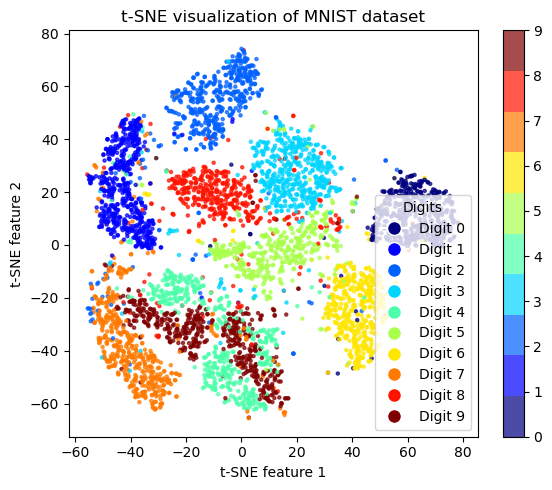

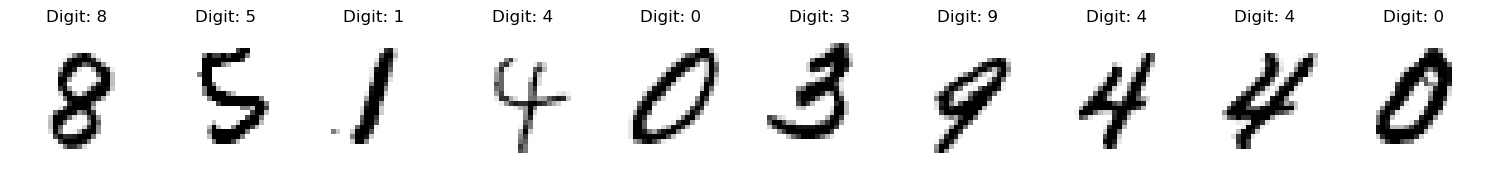

t-SNE visualization complete!


In [10]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target

# Convert target to integer
y = y.astype(int)

# Take a subset of the data to speed up computation
n_samples = 5000
random_idx = np.random.choice(X.shape[0], n_samples, replace=False)
X_subset = X[random_idx]
y_subset = y[random_idx]

# Normalize the data
X_normalized = X_subset / 255.0

# Apply t-SNE
print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, n_iter=1000, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X_normalized)

# Create a color map
num_classes = len(np.unique(y))
colors = plt.cm.jet(np.linspace(0, 1, num_classes))
cmap = ListedColormap(colors)

# Plot the t-SNE results
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap=cmap, alpha=0.7, s=5)
plt.colorbar(scatter)
plt.title("t-SNE visualization of MNIST dataset")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Digit {i}', 
                   markerfacecolor=colors[i], markersize=10) for i in range(num_classes)]
plt.legend(handles=legend_elements, loc='best', title="Digits")

plt.tight_layout()
plt.show()

# Function to plot some example digits
def plot_example_digits(X, y, num_examples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_examples):
        ax = plt.subplot(1, num_examples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray_r')
        plt.title(f"Digit: {y[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot example digits
plot_example_digits(X_subset, y_subset)

print("t-SNE visualization complete!")

## Coding challenge
Let's put in practice some of the skills you've learned so far. Load the California housing data, then perform PCA on it to keep just two dimensions. Then, use this PCA-reduced dataset to perform linear regression with housing prices as the target (/dependent variable). When you're finished, report your resulting model R-squared score in the text box. (Feel free to make changes, e.g. data preprocessing steps etc., if you like.)

In [23]:
# Step 1: Load the California housing dataset
# Hint: from sklearn.datasets import fetch_california_housing

# Step 2: Split the data into features (X) and target (y)

# Step 3: Apply PCA to reduce the feature set to 2 components
# Hint: from sklearn.decomposition import PCA

# Step 4: Perform linear regression on the PCA-reduced dataset
# Hint: from sklearn.linear_model import LinearRegression

# Step 5: Evaluate the model using R-squared score
# Hint: Use model.score(X_pca, y)

# Step 6: Print the R-squared score
# This is the value you will enter into the text box



In [24]:
create_answer_box("Enter your model's R-squared score.", "03-03")

Enter your model's R-squared score.

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

In [25]:
create_answer_box("Try re-running your code with different numbers of PCA components. What do the results of this investigation tell you?", "03-04")

Try re-running your code with different numbers of PCA components. What do the results of this investigation tell you?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()